# 2.1 Gráficos con ggplot2

In [2]:
from matplotlib.pyplot import subplot, scatter, plot, axis
from scipy.stats import linregress

In [3]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from plotnine import *
from plotnine.data import mpg
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [4]:
from datetime import datetime, timedelta

In [5]:
!locale -a

C
C.UTF-8
en_US.utf8
es_ES
es_ES.iso88591
POSIX
spanish


In [1]:
import os

!/usr/share/locales/install-language-pack es_ES
!dpkg-reconfigure locales

# Restart Python process to pick up the new locales
os.kill(os.getpid(), 9)

In [6]:
import locale

# Idioma "es-ES" (código para el español de España)
locale.setlocale(locale.LC_ALL, 'spanish')

'spanish'

In [8]:
precios = pd.read_csv('/content/drive/MyDrive/Visualización/Práctica 1/Precios_2019_20.csv', sep = ";", encoding='latin-1')
precios.head()

,Zona,Cultivo,Año,Mes,Precio
0,CANARIAS,Aguacate,2016,Enero,1.89
1,CANARIAS,Aguacate,2016,Febrero,1.97
2,CANARIAS,Aguacate,2016,Marzo,1.93
3,CANARIAS,Aguacate,2016,Abril,2.09
4,CANARIAS,Aguacate,2016,Mayo,2.42


In [9]:
precios['Precio'] = pd.to_numeric(precios['Precio'], errors = 'coerce')

In [10]:
precios_idx = precios[precios['Precio'].isna()].index
precios = precios.drop(precios_idx)

In [11]:
precios['Fecha'] = precios['Mes'] + '/' + precios['Año'].map(str)

In [12]:
precios['Fecha'] = pd.to_datetime(precios['Fecha'], format="%B/%Y")

In [13]:
precios['Zona'].unique().tolist()

['CANARIAS', 'Gran_Canaria', 'Tenerife', 'La_Palma']

## Gráfico de dispersión

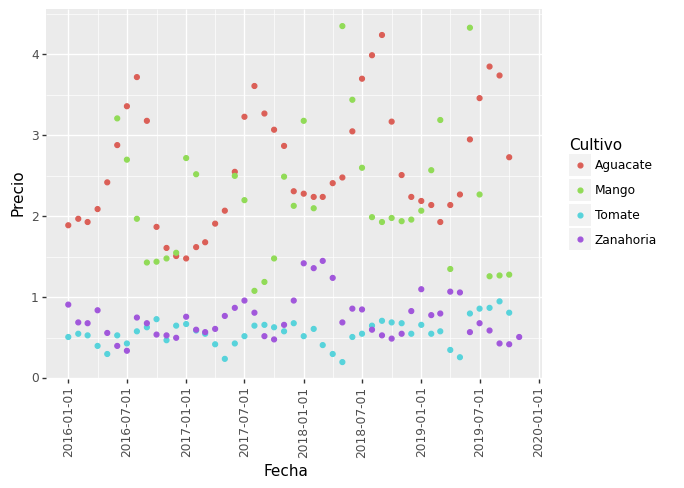

<ggplot: (8735453422801)>

In [230]:
(ggplot(precios[((precios['Cultivo'] == 'Aguacate') | 
                 (precios['Cultivo'] == 'Zanahoria') | 
                 (precios['Cultivo'] == 'Mango') | 
                 (precios['Cultivo'] == 'Tomate')) & 
                 (precios['Zona'] == 'CANARIAS')], 
        aes(x="Fecha", y="Precio", color = 'Cultivo')) 
  + geom_point()
  + theme(axis_text_x = element_text(angle=90))
  + scale_x_date()
  + scale_y_continuous()
  + coord_cartesian()
)

En este gráfico de dispersión muestro los precios de al menos 4 cultivos para la zona de Canarias. 

Los elementos de la grámatica de gráficos usados son los siguientes:

- **Datos y mapeo de los datos a estéticas:** en esta capa selecciono los datos del dataset que se visualizarán en el gráfico mediante operadores lógicos, lo cual podría caer en la categoría de álgebra en la gramática de gráficos de Wilkinson. Por otra parte, también selecciono, en las estéticas, las variables que usaremos, fecha frente a precio, usando el color para determinar cual es cada tipo de cultivo.
- **Escala para cada estética:** uso scale_y_continous() para indicar que se usan valores continuos en el eje y, y scale_x_date() para indicar que los valores del eje x se usen como fechas.
- **Sistema de coordenadas:** uso la función coord_cartesian() para especificar que se usan coordenadas cartesianas en este gráfico.
- **Objetos geométricos:** uso la función geom_point() para especificar el objeto geométrico que se usará, en este caso, puntos.
- **Theme:** Uso esta capa para rotar 90º los elementos del eje x, y que así no se solapen entre sí.



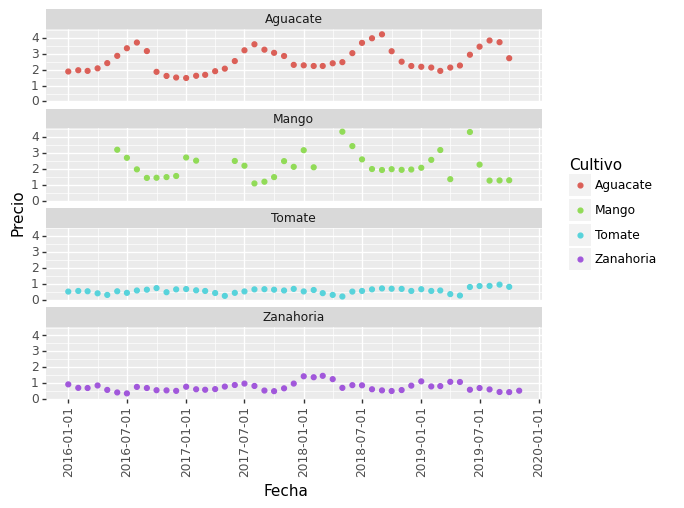

<ggplot: (8735453220809)>

In [231]:
(ggplot(precios[((precios['Cultivo'] == 'Aguacate') | 
                 (precios['Cultivo'] == 'Zanahoria') | 
                 (precios['Cultivo'] == 'Mango') | 
                 (precios['Cultivo'] == 'Tomate')) & 
                 (precios['Zona'] == 'CANARIAS')], 
        aes(x="Fecha", y="Precio", color = 'Cultivo')) 
  + geom_point()
  + facet_wrap('Cultivo', ncol = 1)
  + theme(axis_text_x = element_text(angle=90))
  + scale_x_date()
  + scale_y_continuous()
  + coord_cartesian()
)

En este gráfico de dispersión muestro los precios de al menos 4 cultivos para la zona de Canarias. 

Los elementos de la grámatica de gráficos son los mismos que para el gráfico anterior y además he incluido una capa de **partición o faceting** basada en el tipo de cultivo, para una mejor visualización de los datos.



## Gráfico de evolución de los precios

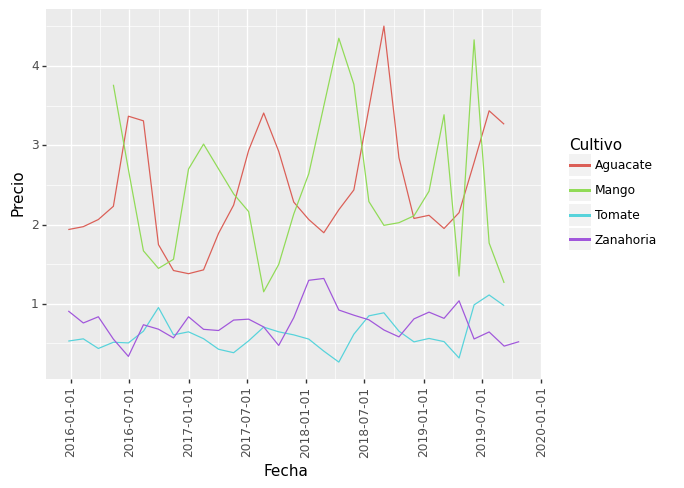

<ggplot: (8735455481993)>

In [239]:
(ggplot(precios[((precios['Cultivo'] == 'Aguacate') | 
                 (precios['Cultivo'] == 'Zanahoria') | 
                 (precios['Cultivo'] == 'Mango') | 
                 (precios['Cultivo'] == 'Tomate'))], 
        aes(x="Fecha", y="Precio", color = 'Cultivo')) 
  + theme(axis_text_x = element_text(angle=90))
  + scale_x_date()
  + scale_y_continuous()
  + stat_summary_bin(fun_y = np.mean, geom = "line")
  + coord_cartesian()
)

En este gráfico muestro la evolución de la media mensual de precios de 4 cultivos.

Los elementos de la grámatica de gráficos usados son los siguientes:

- **Datos y mapeo de los datos a estéticas:** en esta capa selecciono los datos del dataset que se visualizarán en el gráfico mediante operadores lógicos, lo cual podría caer en la categoría de álgebra en la gramática de gráficos de Wilkinson. Por otra parte, también selecciono, en las estéticas, las variables que usaremos, fecha frente a precio, usando el color para determinar cual es cada tipo de cultivo.
- **Escala para cada estética:** uso scale_y_continous() para indicar que se usan valores continuos en el eje y, y scale_x_date() para indicar que los valores del eje x se usen como fechas.
- **Sistema de coordenadas:** uso la función coord_cartesian() para especificar que se usan coordenadas cartesianas en este gráfico.
- **Transformaciones estadísticas:** uso la función stat_summary() para hacer la media entre los precios de todas zonas presentes en los datos.
- **Objetos geométricos:** establezco dentro de la transformación estadística el tipo de objeto geométrico que se usará, en este caso, líneas.
- **Theme:** uso esta capa para rotar 90º los elementos del eje x, y que así no se solapen entre sí.

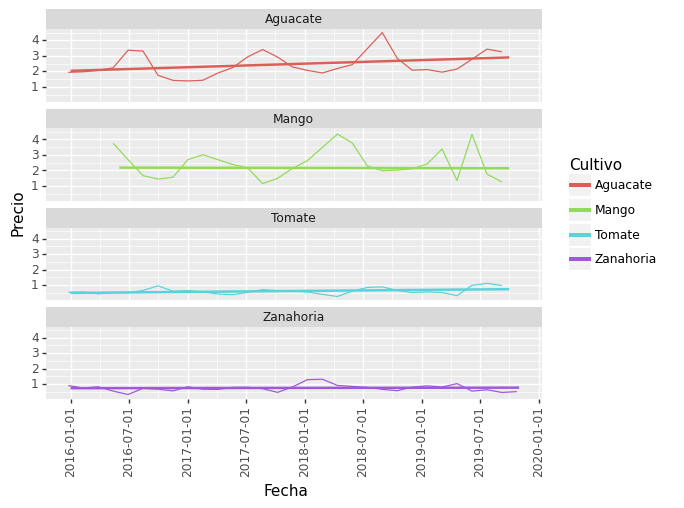

<ggplot: (8735455185445)>

In [235]:
(ggplot(precios[((precios['Cultivo'] == 'Aguacate') | 
                 (precios['Cultivo'] == 'Zanahoria') | 
                 (precios['Cultivo'] == 'Mango') | 
                 (precios['Cultivo'] == 'Tomate'))], 
        aes(x="Fecha", y="Precio", color = 'Cultivo')) 
  + geom_smooth(method="lm", se = False)
  + facet_wrap('Cultivo', ncol = 1)
  + theme(axis_text_x = element_text(angle=90))
  + scale_x_datetime()
  + scale_y_continuous()
  + stat_summary_bin(fun_y = np.mean, geom = "line")
  + coord_cartesian()
)

En este gráfico muestro la evolución de la media mensual de precios de 4 cultivos.

Los elementos de la grámatica de gráficos son los mismos que para el gráfico anterior y además he incluido una capa de **partición o faceting** basada en el tipo de cultivo, para una mejor visualización de los datos.

Por otra parte, también he añadido una curva de regresión por mínimos cuadrados de los datos, usando el objeto geom_smooth(method="lm"). De esta manera, podemos ver la tendencia a lo largo de los años del precio de cada uno de los cultivos:

En el caso del mango y la zanahoria se mantiene bastante estable, mientras que para el tomate y el aguacate ha tendido a aumentar el precio en los últimos años, sobre todo para el caso del aguacate.

## Gráfico de distribución

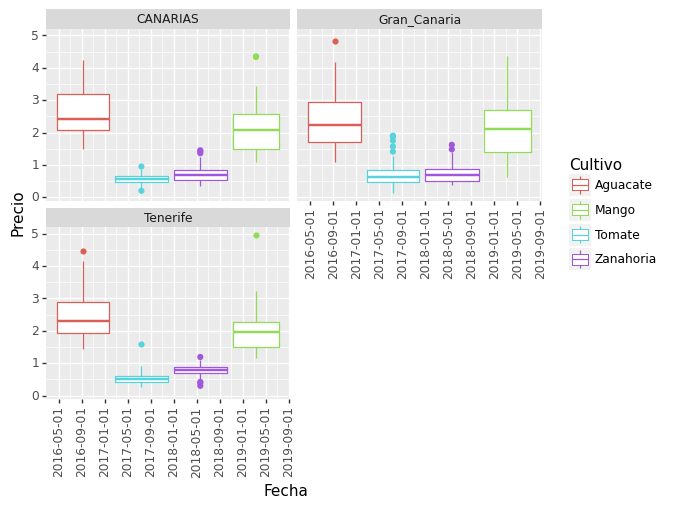

<ggplot: (8735455454773)>

In [236]:
(ggplot(precios[((precios['Cultivo'] == 'Aguacate') | 
                 (precios['Cultivo'] == 'Zanahoria') | 
                 (precios['Cultivo'] == 'Mango') | 
                 (precios['Cultivo'] == 'Tomate'))],
        aes(x="Fecha", y="Precio", color = 'Cultivo'))
  + geom_boxplot()
  + facet_wrap('Zona', ncol = 2)
  + theme(axis_text_x = element_text(angle=90))
  + scale_x_datetime()
  + scale_y_continuous()
  + coord_cartesian()
)

En este gráfico muestro la distribución de los precios de 4 cultivos en todas las islas.

Los elementos de la grámatica de gráficos usados son los siguientes:

- **Datos y mapeo de los datos a estéticas:** en esta capa selecciono los datos del dataset que se visualizarán en el gráfico mediante operadores lógicos, lo cual podría caer en la categoría de álgebra en la gramática de gráficos de Wilkinson. Por otra parte, también selecciono, en las estéticas, las variables que usaremos, fecha frente a precio, usando el color para determinar cual es cada tipo de cultivo.
- **Escala para cada estética:** uso scale_y_continous() para indicar que se usan valores continuos en el eje y, y scale_x_date() para indicar que los valores del eje x se usen como fechas.
- **Sistema de coordenadas:** uso la función coord_cartesian() para especificar que se usan coordenadas cartesianas en este gráfico.
- **Objetos geométricos:** uso la función geom_boxplot() para especificar el objeto geométrico que se usará, en este caso, usaré un boxplot o diagrama de caja, para representar la distribución. También se muestran los posibles outliers.
- **Partición (faceting):** esta capa añade una partición basada en la zona, para poder apreciar la distribución en cada una de ellas.
- **Theme:** uso esta capa para rotar 90º los elementos del eje x, y que así no se solapen entre sí.

# 2.2 Web scraping y análisis exploratorio

In [29]:
#https://rpy2.github.io/doc/v3.0.x/html/interactive.html
%load_ext rpy2.ipython

In [30]:
%%R
install.packages("ggthemes")
install.packages("ggrepel")

library(tidyverse) # tiene ggplot, dplyr, tidyr, y otros
library(ggthemes)  # estilos de gráficos
library(ggrepel)   # etiquetas de texto más prolijas que las de ggplot

install.packages("readxl")
# Leer el paquete
library("readxl")
library(rvest)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/ggthemes_4.2.4.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 444642 bytes (434 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[wri

## Web scraping

Para esta práctica realizaré el web scrapping de los datos de puertos de S/C de Tenerife durante todo el año 2021.

In [ ]:
%%R

html.puertostfe <- read_html("http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias")
rutas<-html.puertostfe %>% html_nodes(".heading")%>%html_attr("href")
rutas<-rutas[2:13]

In [ ]:
%%R

rutas

 [1] "/dataset/trafico-de-mercancias/resource/8e8b96ee-5dc0-4d2a-a0ed-4f820f313c07"
 [2] "/dataset/trafico-de-mercancias/resource/0d3c4f3a-5b52-4a69-84ce-877b9961e911"
 [3] "/dataset/trafico-de-mercancias/resource/208b205c-cf21-4b3a-b40f-f4d7206e1bfc"
 [4] "/dataset/trafico-de-mercancias/resource/b3d98fca-f60b-4d7a-b840-b24a453b5227"
 [5] "/dataset/trafico-de-mercancias/resource/7ef4eea2-7453-4723-a809-0523b05df9ec"
 [6] "/dataset/trafico-de-mercancias/resource/aae001ff-aa59-4351-9729-462fbf7fea95"
 [7] "/dataset/trafico-de-mercancias/resource/1aea4928-636f-4a29-8ca5-20fedc5cfcc5"
 [8] "/dataset/trafico-de-mercancias/resource/fac675ca-9ee0-4486-9bad-3d2e88b1cfb3"
 [9] "/dataset/trafico-de-mercancias/resource/ca8056c4-0f1b-43b2-8e89-f6233e3ca5d8"
[10] "/dataset/trafico-de-mercancias/resource/6bd1a91f-1002-4ef6-a316-267525f58639"
[11] "/dataset/trafico-de-mercancias/resource/976c2918-e6e9-4bef-9f20-75f92cd0ce33"
[12] "/dataset/trafico-de-mercancias/resource/9e79436a-cccd-4a5e-9987-4dfd45

In [ ]:
%%R

url_anio<-"2021"
i=12

for (ruta in rutas[1:12])
{
  url<-"http://risp.puertosdetenerife.org"
  url<-paste(url, paste(ruta, "/download/", sep=""), sep="")
  url<-paste(url, url_anio, sep="")
  if(i<10)
  {
    url_mes <- paste("0", as.character(i),sep="")
  }
  else{
    url_mes <- as.character(i)
  }
  url<-paste(url, paste(url_mes, "traficodemercancias.xls", sep=""), sep="")
  destino<-paste("traficoAux", paste(url_mes,".xlsx", sep=""), sep="")
  #Descarga del fichero
  download.file(url, destino)
  if (i < 12){
  # Agrega el fichero al dataset
    trafico<-rbind(trafico, read_xls(destino))
    print(paste(url_anio, url_mes))
  }
  else if (i==12) trafico<-read_xls(destino)
  i<-i-1
}
str(trafico)
write.csv(trafico, "traficoMercancias_2021.csv")
nrow(trafico)

R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/8e8b96ee-5dc0-4d2a-a0ed-4f820f313c07/download/202112traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/0d3c4f3a-5b52-4a69-84ce-877b9961e911/download/202111traficodemercancias.xls'

R[write to console]: downloaded 1.8 MB




[1] "2021 11"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/208b205c-cf21-4b3a-b40f-f4d7206e1bfc/download/202110traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 10"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/b3d98fca-f60b-4d7a-b840-b24a453b5227/download/202109traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 09"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/7ef4eea2-7453-4723-a809-0523b05df9ec/download/202108traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 08"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/aae001ff-aa59-4351-9729-462fbf7fea95/download/202107traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 07"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/1aea4928-636f-4a29-8ca5-20fedc5cfcc5/download/202106traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 06"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/fac675ca-9ee0-4486-9bad-3d2e88b1cfb3/download/202105traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 05"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/ca8056c4-0f1b-43b2-8e89-f6233e3ca5d8/download/202104traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 04"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/6bd1a91f-1002-4ef6-a316-267525f58639/download/202103traficodemercancias.xls'

R[write to console]: downloaded 1.8 MB




[1] "2021 03"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/976c2918-e6e9-4bef-9f20-75f92cd0ce33/download/202102traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 02"


R[write to console]: trying URL 'http://risp.puertosdetenerife.org/dataset/trafico-de-mercancias/resource/9e79436a-cccd-4a5e-9987-4dfd45d25b04/download/202101traficodemercancias.xls'

R[write to console]: downloaded 1.7 MB




[1] "2021 01"
tibble [89,233 × 15] (S3: tbl_df/tbl/data.frame)
 $ Año                                  : num [1:89233] 2021 2021 2021 2021 2021 ...
 $ Mes                                  : chr [1:89233] "dic" "dic" "dic" "dic" ...
 $ Puerto                               : chr [1:89233] "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" "LA ESTACA (EL HIERRO)" ...
 $ Subgrupo                             : chr [1:89233] "Aceites y grasas" "Asfalto" "Automóviles y sus piezas" "Automóviles y sus piezas" ...
 $ Cód Arancelario Mercancía            : chr [1:89233] "1510A" "2714A" "8703E" "8703E" ...
 $ Descripción Cód Arancelario Mercancía: chr [1:89233] "Los demás aceites, envasados, obtenidos exclusivam" "Betunes y asfaltos naturales." "Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos" "Turismos, No Eléctr. o Híbr. hasta 2,5 Ton, nuevos" ...
 $ Operación                            : chr [1:89233] "Cargadas" "Descargadas" "Cargadas" "Descargadas" ...
 $ País Origen  

In [ ]:
%%R
write.csv2(trafico, "traficoMercancias_2021.csv")
write.csv2(trafico, "/content/drive/MyDrive/Visualización/Práctica 2/traficoMercancias_2021.csv")

## Análisis exploratorio

In [31]:
%%R

trafico <- data.frame(read.csv2(file = "/content/drive/MyDrive/Visualización/Práctica 2/traficoMercancias_2021.csv", header=TRUE, sep = ";"))

In [32]:
%%R

trafico[trafico$Mes=="sep",3]<-"sept"
trafico$Fecha=paste(trafico$Mes, ". ", trafico$Año, sep="")
trafico$Fecha = parse_datetime(trafico$Fecha, "%b %Y", locale = locale("es"))

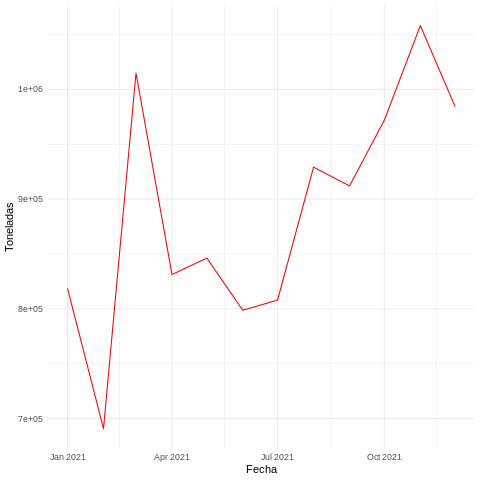

In [241]:
%%R

ggplot(trafico, aes(x=Fecha, y=Toneladas)) +
  theme_minimal() + 
  scale_x_datetime() +
  scale_y_continuous() +
  coord_cartesian() +
  stat_summary(fun = "sum", geom = "line", col = "red")  

En este gráfico muestro la evolución de la cantidad total de mercancías por mes en la provincia de S/C de Tenerife.

Los elementos de la grámatica de gráficos usados son los siguientes:

- **Datos y mapeo de los datos a estéticas:** en esta capa selecciono los datos del dataset que se visualizarán en el gráfico. Por otra parte, también selecciono, en las estéticas, las variables que usaremos, Fecha frente a Toneladas.
- **Escala para cada estética:** uso scale_y_continous() para indicar que se usan valores continuos en el eje y, y scale_x_datetime() para indicar que los valores del eje x se usen como fechas.
- **Sistema de coordenadas:** uso la función coord_cartesian() para especificar que se usan coordenadas cartesianas en este gráfico.
- **Transformaciones estadísticas:** uso la función stat_summary() para hacer la suma de toda la cantidad de toneladas de mercancía para cada uno de los meses.
- **Objetos geométricos:** establezco dentro de la transformación estadística el tipo de objeto geométrico que se usará, en este caso, líneas. También defino el color de la línea como rojo.
- **Theme:** uso esta capa establecer un tema minimalista.

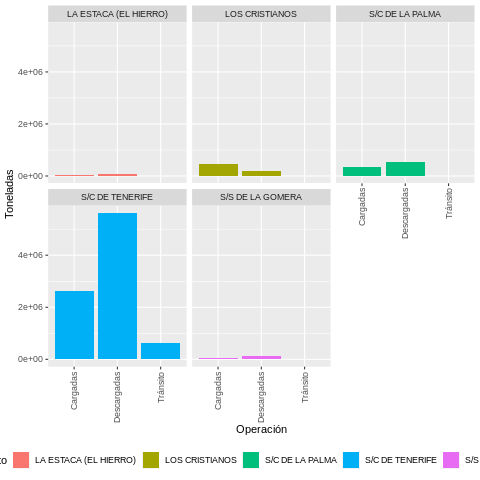

In [224]:
%%R
ggplot(trafico, mapping = aes(x = Operación, y = Toneladas, fill = Puerto)) +
  stat_summary(fun = "sum", geom = "col") +
  scale_y_continuous()+ 
  scale_x_discrete() + 
  coord_cartesian() +
  theme(legend.position= 'bottom', axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1))+
  facet_wrap(~Puerto)

En este gráfico muestro la cantidad total de mercancías para cada tipo de operación: cargadas, descargadas o en tránsito en cada uno de los cinco puertos principales de la provincia de S/C de Tenerife.

Se puede ver que prácticamente no pasan mercancías en tránsito en ninguno de los puertos menores, sino que este tipo de operación sólo se da en el puerto de S/C de Tenerife, donde además se da el grueso de operaciónes de la provincia.

Los elementos de la grámatica de gráficos usados son los siguientes:

- **Datos y mapeo de los datos a estéticas:** en esta capa selecciono los datos del dataset que se visualizarán en el gráfico. Por otra parte, también selecciono, en las estéticas, las variables que usaremos, Operación frente a Toneladas, así como el relleno de las barras, que será en base a la variable Puerto.
- **Escala para cada estética:** uso scale_y_continous() para indicar que se usan valores continuos en el eje y, y scale_x_discrete() para indicar que se usan valores continuos en el eje x.
- **Sistema de coordenadas**: uso la función coord_cartesian() para especificar que se usan coordenadas cartesianas en este gráfico.
- **Transformaciones estadísticas:** uso la función stat_summary() para hacer la suma de toda la cantidad de toneladas de mercancía para cada uno de los meses.
- **Objetos geométricos:** establezco dentro de la transformación estadística el tipo de objeto geométrico que se usará, en este caso, columnas. También defino el color de la línea como rojo.
- **Partición (faceting):** esta capa añade una partición basada en el puerto, para poder apreciar la cantidad de mercancía por tipo de operación en cada uno de los puertos.
- **Theme:** uso esta capa para rotar 90º los elementos del eje x, y que así no se solapen entre sí. También establezco que la leyenda se coloque bajo la gráfica.

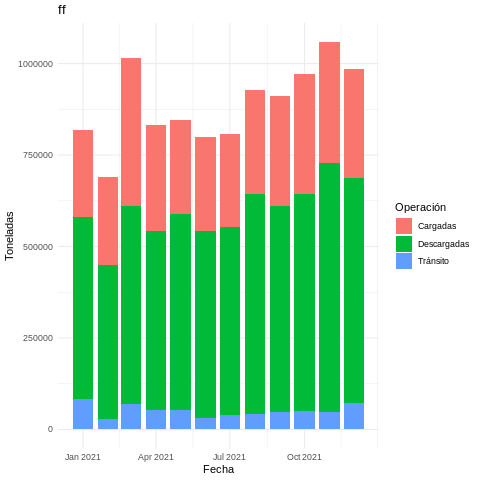

In [243]:
%%R

ggplot(trafico, aes(x=Fecha, y=Toneladas, fill=Operación)) + 
  stat_summary(fun = "sum", geom = "bar", position = "stack") + 
  scale_x_datetime() +
  scale_y_continuous() +
  theme_minimal() +
  coord_cartesian()

En este gráfico muestro la evolución de la cantidad total de mercancías por mes en la provincia de S/C de Tenerife. Uso para ello unas barras apiladas rellenas con la variable Operación para visualizar a la vez que la cantidad de mercancía, el tipo de operación que se realiza.

Puede apreciarse que, en general, la cantidad de mercancía descargada, suele ser aproximadamente el doble que la cargada, por lo que queda claro que la provincia de S/C de Tenerife depende en gran medida de las importaciones.

Los elementos de la grámatica de gráficos usados son los siguientes:

- **Datos y mapeo de los datos a estéticas:** en esta capa selecciono los datos del dataset que se visualizarán en el gráfico. Por otra parte, también selecciono, en las estéticas, las variables que usaremos, Fecha frente a Toneladas, así como el relleno de las barras, que será en base a la variable Operación.
- **Escala para cada estética:** uso scale_y_continous() para indicar que se usan valores continuos en el eje y, y scale_x_datetime() para indicar que los valores del eje x se usen como fechas.
- **Sistema de coordenadas:** uso la función coord_cartesian() para especificar que se usan coordenadas cartesianas en este gráfico.
- **Transformaciones estadísticas:** uso la función stat_summary() para hacer la suma de toda la cantidad de toneladas de mercancía para cada uno de los meses.
- **Objetos geométricos:** establezco dentro de la transformación estadística el tipo de objeto geométrico que se usará, en este caso, barras. También defino, gracias al atributo position="stack", que cada uno de los elementos se sitúen encima de los otros.
- **Theme:** uso esta capa establecer un tema minimalista.

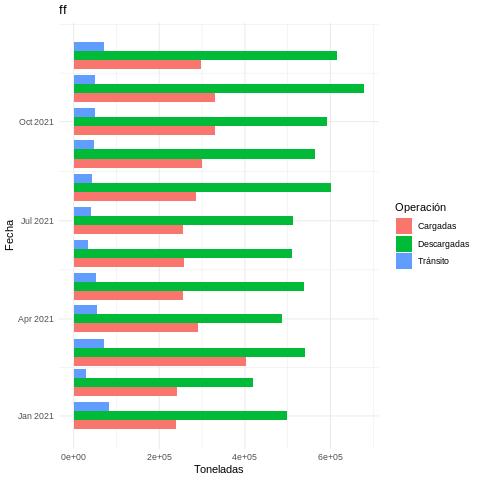

In [221]:
%%R

ggplot(trafico, aes(x=Fecha, y=Toneladas, fill=Operación)) + 
  stat_summary(fun = "sum", geom = "bar", position = "dodge") + 
  scale_x_datetime() +
  scale_y_continuous() +
  theme_minimal() +
  coord_flip()

En este gráfico muestro la evolución de la cantidad total de mercancías por mes en la provincia de S/C de Tenerife. Uso para ello barras agrupadas rellenas con la variable Operación para visualizar a la vez que la cantidad de mercancía, el tipo de operación que se realiza.

Puede apreciarse que, en general, la cantidad de mercancía descargada, suele ser aproximadamente el doble que la cargada, por lo que queda claro que la provincia de S/C de Tenerife depende en gran medida de las importaciones.

Los elementos de la grámatica de gráficos usados son los siguientes:

- **Datos y mapeo de los datos a estéticas:** en esta capa selecciono los datos del dataset que se visualizarán en el gráfico. Por otra parte, también selecciono, en las estéticas, las variables que usaremos, Fecha frente a Toneladas, así como el relleno de las barras, que será en base a la variable Operación.
- **Escala para cada estética:** uso scale_y_continous() para indicar que se usan valores continuos en el eje y, y scale_x_datetime() para indicar que los valores del eje x se usen como fechas.
- **Sistema de coordenadas:** uso la función coord_flip() para especificar que las coordenadas se voltean en este gráfico.
- **Transformaciones estadísticas:** uso la función stat_summary() para hacer la suma de toda la cantidad de toneladas de mercancía para cada uno de los meses.
- **Objetos geométricos:** establezco dentro de la transformación estadística el tipo de objeto geométrico que se usará, en este caso, barras. También defino, gracias al atributo position="dodge", que cada uno de los elementos se sitúen al lado de los otros.
- **Theme:** uso esta capa establecer un tema minimalista.